In [1]:
import hog
import neural

2022-12-05 20:38:50.941647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# create hog descriptors of a dataset
ds = hog.load_dataset()
hog_descriptors = hog.normalise_features(hog.create_HOG_descriptors(ds))

Found 4700 files belonging to 45 classes.


2022-12-05 20:38:57.686438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# create neural descriptors of a dataset
neural_descriptors = neural.normalise_features(neural.create_neural_descriptors(ds))

In [4]:
# reduce hog descriptors via PCA and LLE
hog_PCA = hog.reduce_with_PCA(hog_descriptors, n_components=50)
hog_LLE = hog.reduce_with_PCA(hog_descriptors)

In [5]:
# reduce neural descriptors via PCA and LLE
neural_PCA = neural.reduce_with_PCA(neural_descriptors, n_components=50)
neural_LLE = neural.reduce_with_PCA(neural_descriptors)

In [6]:
# Apply KMeans Clustering to hog descriptors
hog_PCA_kmeans, hog_PCA_clustering = hog.KMeans_clustering(hog_PCA)
hog_LLE_kmeans, hog_LLE_clustering = hog.KMeans_clustering(hog_LLE)

In [7]:
# Apply KMeans Clustering to neural descriptors
neural_PCA_kmeans, neural_PCA_clustering = neural.KMeans_clustering(neural_PCA)
neural_LLE_kmeans, neural_LLE_clustering = neural.KMeans_clustering(neural_LLE)

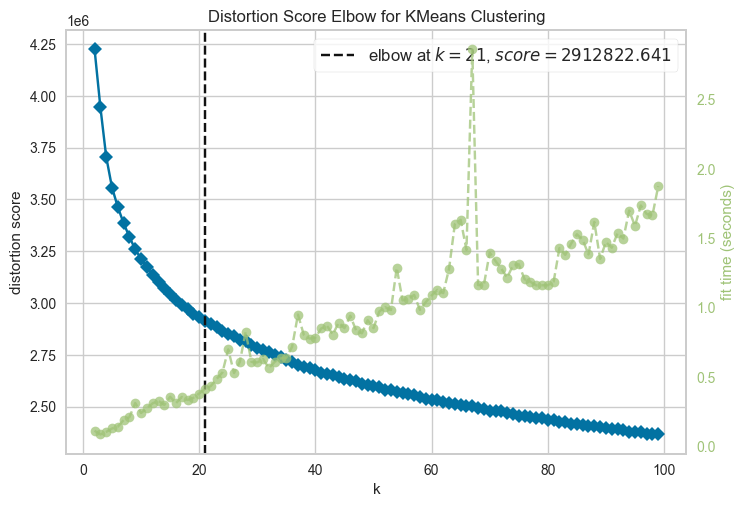

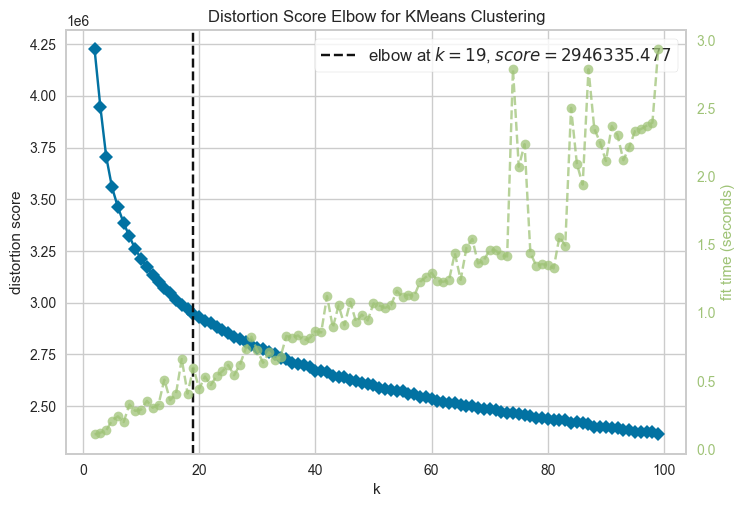

In [8]:
# Visualise, with an elbow test, goodness of clustering
hog.KMeans_Elbow(hog_PCA, (2,100))
hog.KMeans_Elbow(hog_LLE, (2,100))

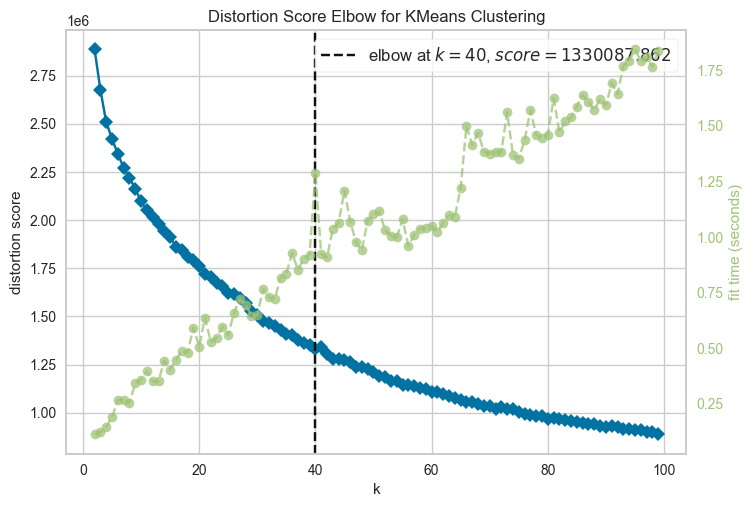

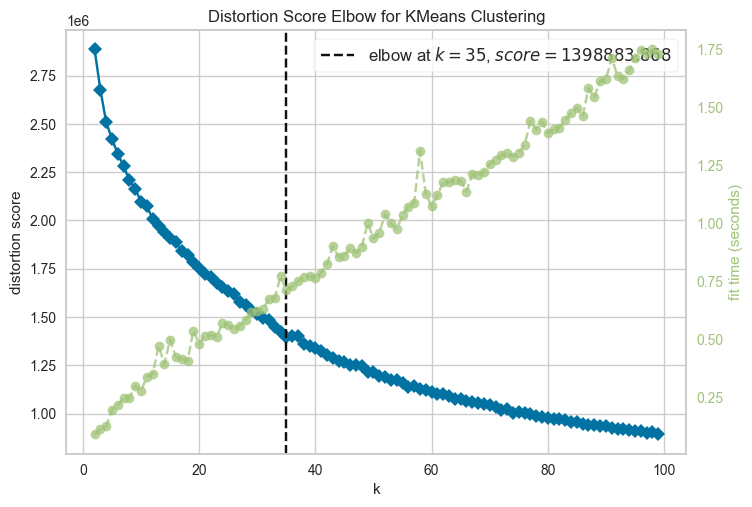

In [9]:
neural.KMeans_Elbow(neural_PCA, (2,100))
neural.KMeans_Elbow(neural_LLE, (2,100))